In [0]:
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [71]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/FA-ClassDF.pkl', 'rb') as f:
  df_fa = pickle.load(f)
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/GA-ClassDF.pkl', 'rb') as f:
  df_ga = pickle.load(f)
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/B-ClassDF.pkl', 'rb') as f:
  df_b = pickle.load(f)
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/C-ClassDF.pkl', 'rb') as f:
  df_c = pickle.load(f)

In [0]:
df_ga["class"] = 'GA'
df_ga['class_alpha'] = 'GA'

In [0]:
df = pd.concat([df_fa, df_ga, df_b, df_c])

In [0]:
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/DF-All-Fullish.pkl', 'wb') as f:
  pickle.dump(df,f)

In [0]:
with open('/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /data/DF-All-Fullish.pkl', 'rb') as f:
  df_new = pickle.load(f)

In [62]:
df.columns

Index(['diameter', 'closeness', 'clustering', 'betweenness', 'edit count',
       'editor count', 'article size', 'class', 'class_alpha'],
      dtype='object')

In [26]:
melted = df.melt(id_vars=["class_alpha"], value_vars=['edit count','editor count', 'article size'])
melted.head()

,class_alpha,variable,value
0,FA,edit count,9559
1,FA,edit count,2871
2,FA,edit count,4844
3,FA,edit count,2468
4,FA,edit count,1291


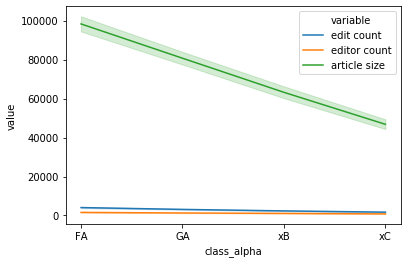

In [32]:
sns.lineplot(data=melted, x='class_alpha', y='value', hue='variable')

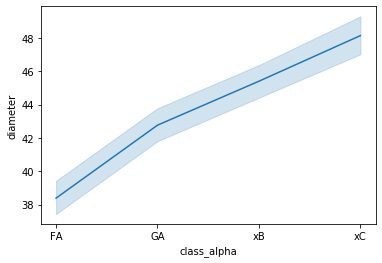

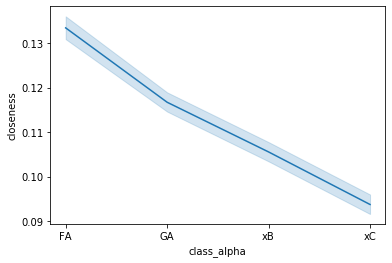

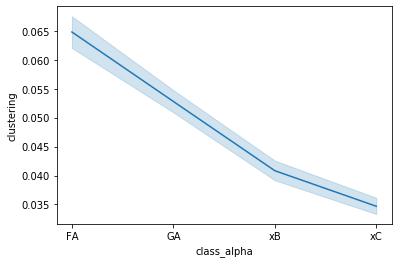

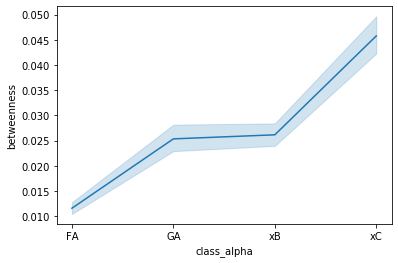

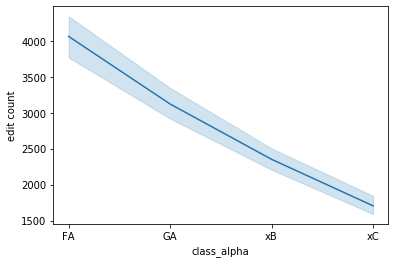

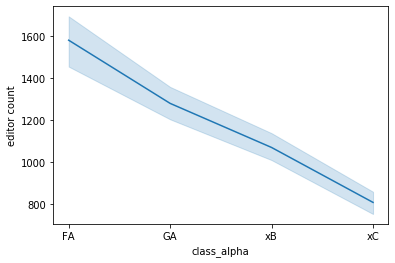

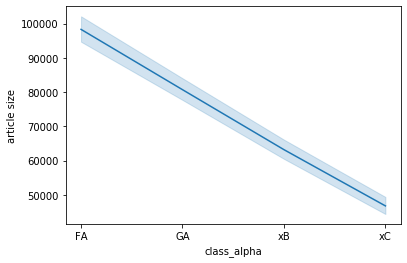

In [80]:
for col in ['diameter', 'closeness', 'clustering', 'betweenness', 'edit count', 'editor count', 'article size']:
  #col = 'diameter'
  plt.figure()
  ax = None
  ax = sns.lineplot(data=df, x='class_alpha', y=col)
  ax.get_figure().savefig("/content/drive/Shared drives/CS Comps: Wikipedia Article Trajectories /fullish_linegraphs/{}.png".format(col))
  ax = None
  

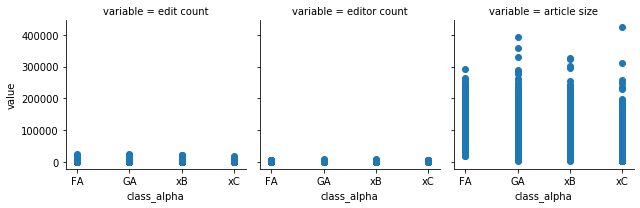

In [38]:
"g = sns.FacetGrid(melted, col="variable")
g = g.map(plt.scatter, "class_alpha", "value")

KeyboardInterrupt: ignored

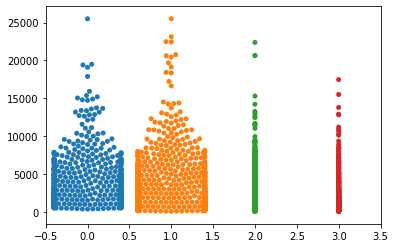

In [63]:
column = 'edit count'
sns.swarmplot(data=df, y=column, x="class", order=["FA", "GA", "B", "C"])

In [64]:
df['class'].unique()

array(['FA', 'GA', 'B', 'C'], dtype=object)